

# Data Visualization (Workbook)

### ITCS 4156:  Introduction to Machine Learning 
### Minwoo "Jake" Lee

# Goal
The goal of this activity is to introduce and practice using popular data science libraries by doing some very basic data visualization and preprocessing. You'll want to fill in any code that is specified by the `TODO` comments and Markdown cells. It should be noted, that all the correct outputs are given below each code cell. It might be useful to duplicate all the `TODO` cells so you can try to match the correct output with your own code!

# Agenda

- Quick overview of Jupyter Notebook
- Practice how to deal with data **without** using ML tools
- Navigate and download data in UCI Repository
- Load data via Numpy and Pandas
- Apply simple preprocessing
- Generate plots to visualize data via Matplotlib and Pandas

# Jupyter Basics

## What is Jupyter Notebook?
Jupyter Notebook is a combination of code and text elements (Markdown, figures, equations, and other media). It is a server-client application which runs via your browser and local-host. Every notebook has a kernel which is your computational engine for running the code (the Python kernel is used by default although other language kernels can be used).

Notebook has become a popular tool for data scientist due to its natural integration with data visualization. In addition, it has become a popular meidum for introducing coding concepts, developing interactive code, live demos, and code sharing in general.

## Useful Jupyter Tricks and Commands
Below are list of commands you might find yourself frequently using. If you are using a Mac simply replace `CTRL` with `CMD`.
- List of keybindings `H`
- Run a cell when selected `CTRL-ENTER`
- Run call and move to next cell `SHIFT-ENTER`
- Insert a new cell `ESC-B`
- Convert cell to Markdown `ESC-M`
- Delete a cell `ESC-D-D`
- Save notebook `CTRL-S`
- Search only over code `ESC-F`
- Show/hide cell output `ESC-O`
- To reset your notebook's environment and memory go to the menu bar at the top and nagviate to `Kernel -> Restart` **(Note: this will not clear cell output)**
    - Other commands can be found under `Kernel` such as `Restart & Clear Output` which will clear all cell output 

## References
- [Offical Jupyter documentation](https://jupyter-notebook-beginner-guide.readthedocs.io/en/latest/what_is_jupyter.html)
- [Interesting Jupyter tips and tricks](https://towardsdatascience.com/jupyter-notebook-hints-1f26b08429ad)
- [More tips and tricks](https://www.dataquest.io/blog/jupyter-notebook-tips-tricks-shortcuts/)
- [Offical documentation on iPython magics](https://ipython.readthedocs.io/en/stable/interactive/magics.html)

# Preparing Data

Let's visit UCI Data Repository: https://archive.ics.uci.edu/ml/index.php. Here, you can find datasets that you might be interested in, although there are many other data repositories out there as well. In this practice, download the following two datasets:
- Forest Fires Data: https://archive.ics.uci.edu/ml/datasets/Forest+Fires
    - Download `forestfires.csv` and `forestfires.names 	`
- Auto MPG Data: https://archive.ics.uci.edu/ml/datasets/Auto+MPG
    - Download `auto-mpg.data-original 	`

First, we import the libraries we are going to use. For data handling, we can use either Numpy or Pandas. For plotting, we will use Matplotlib - although Pandas can do some plotting as well. 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# This is a python magic command.
# This command allows the output of matplotlib to be displayed inline, i.e. under the cell.
%matplotlib inline

Once you download the data, you can run the following shell commands to see the content of a file. **These commands will only work in Linux and Mac.**

The `!` symbol in a code cell allows you to run command line arguments based on your host OS.

In [2]:
!head -30 forestfires.csv

X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0,0
7,4,oct,tue,90.6,35.4,669.1,6.7,18,33,0.9,0,0
7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0,0
8,6,mar,fri,91.7,33.3,77.5,9,8.3,97,4,0.2,0
8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0,0
8,6,aug,sun,92.3,85.3,488,14.7,22.2,29,5.4,0,0
8,6,aug,mon,92.3,88.9,495.6,8.5,24.1,27,3.1,0,0
8,6,aug,mon,91.5,145.4,608.2,10.7,8,86,2.2,0,0
8,6,sep,tue,91,129.5,692.6,7,13.1,63,5.4,0,0
7,5,sep,sat,92.5,88,698.6,7.1,22.8,40,4,0,0
7,5,sep,sat,92.5,88,698.6,7.1,17.8,51,7.2,0,0
7,5,sep,sat,92.8,73.2,713,22.6,19.3,38,4,0,0
6,5,aug,fri,63.5,70.8,665.3,0.8,17,72,6.7,0,0
6,5,sep,mon,90.9,126.5,686.5,7,21.3,42,2.2,0,0
6,5,sep,wed,92.9,133.3,699.6,9.2,26.4,21,4.5,0,0
6,5,sep,fri,93.3,141.2,713.9,13.9,22.9,44,5.4,0,0
5,5,mar,sat,91.7,35.8,80.8,7.8,15.1,27,5.4,0,0
8,5,oct,mon,84.9,32.8,664.2,3,16.7,47,4.9,0,0
6,4,mar,wed,89.2,27.9,70.8,6.3,15.9,35,4,0,0
6,4,apr,sat,86.3,27.4,97.1,5.1,9.3,44,4.5,0,0
6,4,sep,tue,91,12

In [3]:
!tail -30 forestfires.csv

5,4,aug,tue,95.1,141.3,605.8,17.7,26.4,34,3.6,0,16.4
4,4,aug,tue,95.1,141.3,605.8,17.7,19.4,71,7.6,0,46.7
4,4,aug,wed,95.1,141.3,605.8,17.7,20.6,58,1.3,0,0
4,4,aug,wed,95.1,141.3,605.8,17.7,28.7,33,4,0,0
4,4,aug,thu,95.8,152,624.1,13.8,32.4,21,4.5,0,0
1,3,aug,fri,95.9,158,633.6,11.3,32.4,27,2.2,0,0
1,3,aug,fri,95.9,158,633.6,11.3,27.5,29,4.5,0,43.32
6,6,aug,sat,96,164,643,14,30.8,30,4.9,0,8.59
6,6,aug,mon,96.2,175.5,661.8,16.8,23.9,42,2.2,0,0
4,5,aug,mon,96.2,175.5,661.8,16.8,32.6,26,3.1,0,2.77
3,4,aug,tue,96.1,181.1,671.2,14.3,32.3,27,2.2,0,14.68
6,5,aug,tue,96.1,181.1,671.2,14.3,33.3,26,2.7,0,40.54
7,5,aug,tue,96.1,181.1,671.2,14.3,27.3,63,4.9,6.4,10.82
8,6,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0
7,5,aug,tue,96.1,181.1,671.2,14.3,21.6,65,4.9,0.8,0
4,4,aug,tue,96.1,181.1,671.2,14.3,20.7,69,4.9,0.4,0
2,4,aug,wed,94.5,139.4,689.1,20,29.2,30,4.9,0,1.95
4,3,aug,wed,94.5,139.4,689.1,20,28.9,29,4.9,0,49.59
1,2,aug,thu,91,163.2,744.4,10.1,26.7,35,1.8,0,5.8
1,2,aug,fri,91,166.9,752.6,

In [4]:
!tail -20 forestfires.names


   For more information, read [Cortez and Morais, 2007].

   1. X - x-axis spatial coordinate within the Montesinho park map: 1 to 9
   2. Y - y-axis spatial coordinate within the Montesinho park map: 2 to 9
   3. month - month of the year: "jan" to "dec" 
   4. day - day of the week: "mon" to "sun"
   5. FFMC - FFMC index from the FWI system: 18.7 to 96.20
   6. DMC - DMC index from the FWI system: 1.1 to 291.3 
   7. DC - DC index from the FWI system: 7.9 to 860.6 
   8. ISI - ISI index from the FWI system: 0.0 to 56.10
   9. temp - temperature in Celsius degrees: 2.2 to 33.30
   10. RH - relative humidity in %: 15.0 to 100
   11. wind - wind speed in km/h: 0.40 to 9.40 
   12. rain - outside rain in mm/m2 : 0.0 to 6.4 
   13. area - the burned area of the forest (in ha): 0.00 to 1090.84 
   (this output variable is very skewed towards 0.0, thus it may make
    sense to model with the logarithm transform). 

8. Missing Attribute Values: None


# Read data with Numpy

## What is Numpy?

Numpy is a scientific library that is frequently used for its  highly optimized linear algebra powers. One of Numpy's main attractions is its N-dimensional array objects which work great for multi-dimensional datasets!

We first read the forest fire data with Numpy's `loadtxt()` function. Try running the following code, but don't worry if it throws an error! Be sure to read the error and try to understand what's going wrong.

In [5]:
dat = np.loadtxt("forestfires.csv")

ValueError: could not convert string to float: 'X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area'

As we observed in the error above, we need to convert strings to digits. Firstly, this is because Numpy arrays typically don't like storing strings. Secondly, later we will be plotting and preforming numerical computations which will fail if our array contains a string. The following codes provide the converters which use a combination of Python dictionaries and functions to map a string to an integer (Note: The 2 and 3 passed in the converter correspond to the columns in data that contain strings and need to be converted). Lastly, the `np.loadtxt()` stores the data into `dat` a Numpy array.  

If you want to know more about the `np.loadtxt()` function check out the documentation [here](https://docs.scipy.org/doc/numpy/reference/generated/numpy.loadtxt.html).

In [6]:
# Python dictionaries that map the expected strings contained withing the data to our specified output
monthdic = {b'jan': 1, b'feb':2, b'mar':3, b'apr':4, b'may':5, b'jun':6, 
            b'jul': 7, b'aug':8, b'sep':9, b'oct':10, b'nov': 11, b'dec': 12}
daydic = {b'mon': 1, b'tue':2, b'wed':3, b'thu':4, b'fri':5, b'sat':6, b'sun':7 }

def month_conv(s):
    """ Simple python function that returns the value from the monthdic given a key. """
    return monthdic[s]

def day_conv(s):
    """ Simple python function that returns the value from the daydic given a key. """
    return daydic[s]

# Returns a np.ndarray object
dat = np.loadtxt("forestfires.csv", delimiter=',', skiprows=1,
                 converters={2:month_conv, 3:day_conv})

dat # Adding a variable to the last line of a cell will automatically print its output below

array([[ 7.  ,  5.  ,  3.  , ...,  6.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  0.9 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 7.  ,  4.  ,  8.  , ...,  6.7 ,  0.  , 11.16],
       [ 1.  ,  4.  ,  8.  , ...,  4.  ,  0.  ,  0.  ],
       [ 6.  ,  3.  , 11.  , ...,  4.5 ,  0.  ,  0.  ]])

The code below is equivalent to the above code but uses Python's `lambda`functions instead.

Lambda functions are basically functions that you can declare on the spot and can be quite useful for data preprocessing!

In [7]:
# Or using lambda function 
dat = np.loadtxt("forestfires.csv", delimiter=',', skiprows=1, 
                 converters={2: lambda x: monthdic[x], 3: lambda x: daydic[x]})
dat

array([[ 7.  ,  5.  ,  3.  , ...,  6.7 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  0.9 ,  0.  ,  0.  ],
       [ 7.  ,  4.  , 10.  , ...,  1.3 ,  0.  ,  0.  ],
       ...,
       [ 7.  ,  4.  ,  8.  , ...,  6.7 ,  0.  , 11.16],
       [ 1.  ,  4.  ,  8.  , ...,  4.  ,  0.  ,  0.  ],
       [ 6.  ,  3.  , 11.  , ...,  4.5 ,  0.  ,  0.  ]])

We can check the dimensionality of our data by simply adding `.shape` to the end of our `dat` variable. This `np.ndarray` object variable is extremely useful for seeing how many data samples (typically rows) and features (typically columns) we have.

In [8]:
dat.shape

(517, 13)

Sometimes, actually in many cases, the data may contain lots of missing values. Let's check if it our data does. To do so we use Numpy's `np.isnan()` and `np.any()` functions.  Luckily, we do won't find any for the forest fire data.

In [9]:
np.isnan(dat)

array([[False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       ...,
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False],
       [False, False, False, ..., False, False, False]])

In [10]:
np.any(np.isnan(dat))

False

When you do not know how to use a function but lazy to search on web, you can use question mark `?` to see the quick reference as shown below. Try running the lazy searches below to see the official documentation of `np.isnan` and `np.any`. 

In [11]:
np.any?

In [12]:
np.isnan?

# Now let's read our data with Pandas
## What is Pandas?
Pandas is a high-level data manipulation and analysis tool built on-top of Numpy. In particular, it can be easier to work with when preprocessing data, although it can be slower that Numpy in certain cases. Plus, Pandas tends to be easier on the eyes when visualizing raw datasets. Pandas main object is called `DataFrame` which is similar to Numpy's `ndarray` object.

For this section, we will use the Pandas library. You can find the reference here: https://pandas.pydata.org/pandas-docs/stable/reference/index.html. 


### TODO
1. Use Pandas pd.read_csv() to load in the forest fire dataset
    - Note: We will not get an error this time as Pandas DataFrame object allows for strings
2. Run the cell to output `df` and observe the raw dataset

In [13]:
#TODO: Load forest fires data using pd.read_csv() 
df = pd.read_csv("forestfires.csv") 
df

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### TODO
Let's now play with some Pandas functions using the Pandas references.
 **Hint: Check out the [Pandas DataFrame methods](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.html)!**
1. Print the first 5 rows of `df`
2. Print the column names of `df`
3. Print the shape of `df`
4. Print the size of `df`

In [14]:
#TODO: Print the first 5 fows of df
df.head()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.0
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.0


In [15]:
# TODO: Print all column names
df.columns.values

array(['X', 'Y', 'month', 'day', 'FFMC', 'DMC', 'DC', 'ISI', 'temp', 'RH',
       'wind', 'rain', 'area'], dtype=object)

In [16]:
# TODO: Print the shape of the Pandas DataFrame
df.shape

(517, 13)

In [17]:
# TODO: print the size of the Pandas DataFrame
df.size

6721

### TODO
Let's replicate what we did with the Numpy example
1. Convert the `df` to a boolean DataFrame where True corresponds to a element with a missing value
    - **Hint: Try Pandas DataFrame `isnull()` method**
2. Check the entire DataFrame to see if there are any missing values
    - **Hint: Use the boolean DataFrame generated from the previous step to check for any True values**
    - **Hint: Try using `np.any() like we did with Numpy**

In [18]:
# TODO: Check for missing values (i.e. None/null values) like what we did with Numpy in the previous section
# Hint: Try Pandas DataFrame isnull() method
df.isnull()

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,False,False,False,False,False,False,False,False,False,False,False,False,False
513,False,False,False,False,False,False,False,False,False,False,False,False,False
514,False,False,False,False,False,False,False,False,False,False,False,False,False
515,False,False,False,False,False,False,False,False,False,False,False,False,False


In [19]:
# TODO: Check the entire DataFrame to see if there are any missing values
# Hint: Use the boolean DataFrame generated from the previous step to check for any True values
# Hint: Try using np.any() like we did with Numpy
np.any(df.isnull())

False

### TODO
Splicing arrays and DataFrames is very useful way of looking at only parts of your data. Pandas allows you to splice a DataFrame based on column names and intergers.

1. Print the values for the 'area' column in `df` by splicing it
    - **Hint: Checkout  Pandas DataFrame documentation `loc` and `iloc` methods**

In [20]:
# TODO: Print the values for the "area" column in `df`
# Hint: Checkout Pandas DataFrame documentation `loc` and `iloc` methods
df.loc[:, 'area']

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

### TODO
Pandas allows you to automatically compute some useful statistics about your DataFrame, such as mean and STD.

1. Print the summary using the Pandas `describe()` method

In [21]:
# TODO: Print the summary using the Pandas describe() method
df.describe()

,X,Y,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,4.669246,4.299807,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292
std,2.313778,1.229900,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818
min,1.000000,2.000000,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000
25%,3.000000,4.000000,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000
50%,4.000000,4.000000,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000
75%,7.000000,5.000000,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000
max,9.000000,9.000000,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000


## Visualize data using Matplotlib
### What is Matplotlib?
Matplotlib is a very popular and easy to work with plotting library that provides a MATLAB-like interface. It also just so happens to integrate nicely with Jupyter Notebooks, Numpy, and Pandas.

### TODO
1. Plot a line graph using the 'area' column from the previous step by using `plt.plot()`
    - Documentation for [plt.plot()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.plot.html)
    - **Hint: `plt.plot()` will automatically generate the x-axis if not passed**
2. Plot a histogram graph using the 'area' column from the previous step by using `plt.hist()`
    - Documentation for [plt.hist()](https://matplotlib.org/api/_as_gen/matplotlib.pyplot.hist.html)
    - **Hint: `plt.hist()` will automatically generate the bins if not passed**

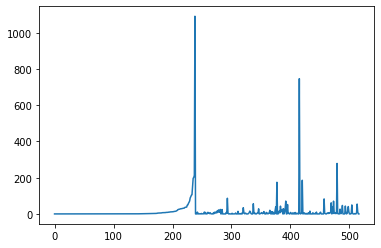

In [22]:
# TODO: Plot a line graph using the 'area' values from the previous step by using plt.plot()
# Hint: plt.plot() will automatically generate the x-axis if not passed
plt.plot(df.loc[:, 'area'])

**TODO: plot the histograme of  'area' values by using plt.hist() **

(array([508.,   6.,   1.,   0.,   0.,   0.,   1.,   0.,   0.,   1.]),
 array([   0.   ,  109.084,  218.168,  327.252,  436.336,  545.42 ,
         654.504,  763.588,  872.672,  981.756, 1090.84 ]),
 <a list of 10 Patch objects>)

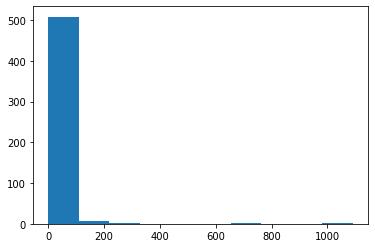

In [23]:
# TODO: Plot a histogram graph using the 'area' values from the previous step by using plt.hist()
# Hint: plt.hist() will automatically generate the bins if not passed
plt.hist(df.loc[:, 'area'])

## Putting it all together
### Splitting data into features and targets
Later in the course we'll find that we will want to predict a given feature, which we refer to as our target. The remaining features in our data will acts as our input data to predict the target. Thus, it can be useful to split our input features and target into two different variables.  

To predict the target feature 'area' we store the 'area' column into a variable **T** and the treat the rest of the columns as input features, storing them inside **X**.

In [24]:
# Store target feature in T
T = df.loc[:, 'area'].copy()
T

0       0.00
1       0.00
2       0.00
3       0.00
4       0.00
       ...  
512     6.44
513    54.29
514    11.16
515     0.00
516     0.00
Name: area, Length: 517, dtype: float64

In [25]:
# Store remaining features in X
X = df.iloc[:, :-1].copy()
X

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


Notice that our X data contains strings for the 'month' and 'day' columns. Remeber we did not convert these strings to numerical data yet for our Pandas exmaple. 

### TODO
1. Create a converter similar to what we did in the Numpy example
    - **Hint: You can use the `apply()` method for the Pandas DataFrame - try finding the documentation on your own** 
    - **Hint: Reuse the dictionaries and functions used in the Numpy example for the `apply()` method**

In [26]:
# TODO: Create a converter similar to above to converter we used for the Numpy example
# Hint: You can use the apply() method for the Pandas DataFrame - try finding the documentation on your own
# Hint: Reuse the dictionaries and functions used in the Numpy example for the apply() method
monthdic = {'jan': 1, 'feb':2, 'mar':3, 'apr':4, 'may':5, 'jun':6, 
            'jul': 7, 'aug':8, 'sep':9, 'oct':10, 'nov': 11, 'dec': 12}
daydic = {'mon': 1, 'tue':2, 'wed':3, 'thu':4, 'fri':5, 'sat':6, 'sun':7 }

X['month'] = X['month'].apply(lambda x: monthdic[x])
X['day'] = X['day'].apply(lambda x: daydic[x])
X

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0


The following codes plots all the input features by using subplot() arranged in 3 by 4 grid (i.e. there are 3*4=12 suplots). The tight_layout() prevents the subfigures from overlapping. 

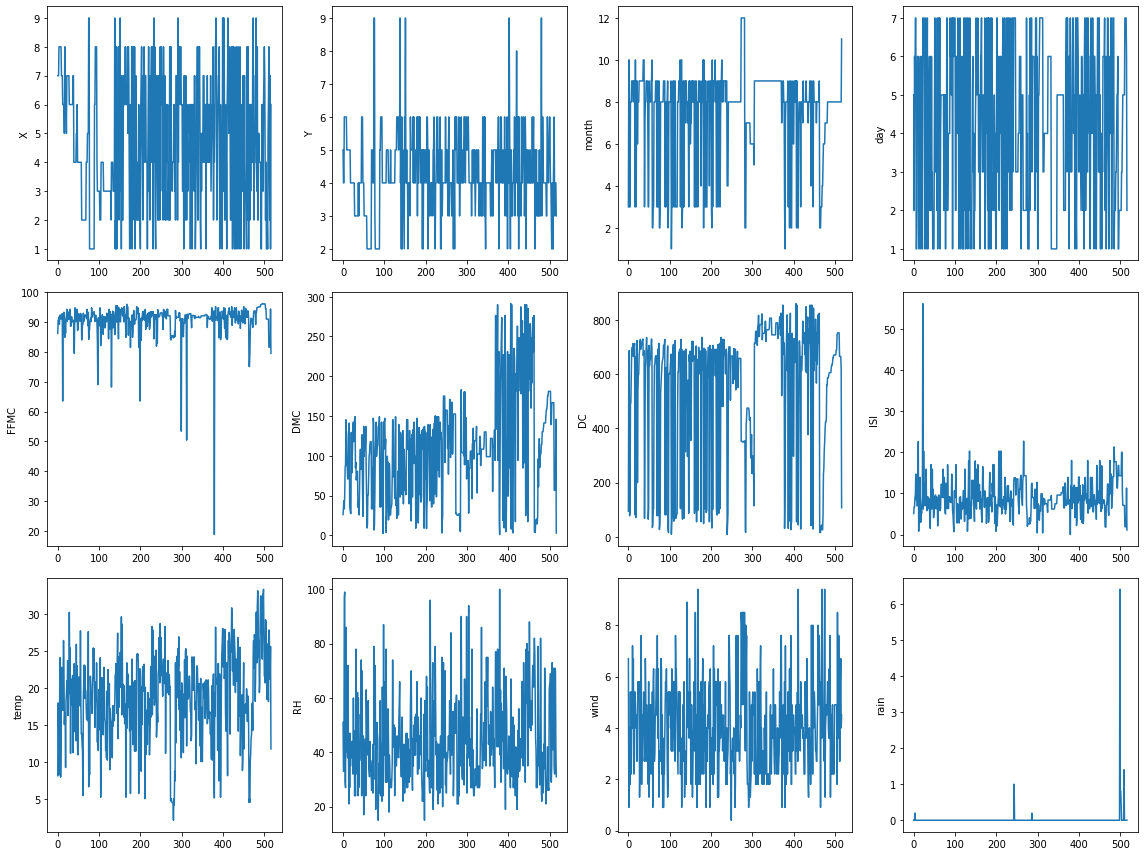

In [27]:
fig = plt.figure(figsize=(16,12))
plt.clf() # Clear previous plt figure
for i in range(12):
    plt.subplot(3, 4, i+1) # Selects which subplot to plot to
    plt.plot(X.iloc[:, i]) # Plots a given column
    plt.ylabel(X.columns.values[i]) # Sets Y label
fig.tight_layout()

### TODO
1. Try to generate a 3 by 4 subplot of your own presenting the correlation between each input feature and the target
    - **Hint: The code should be very similar to the above example**

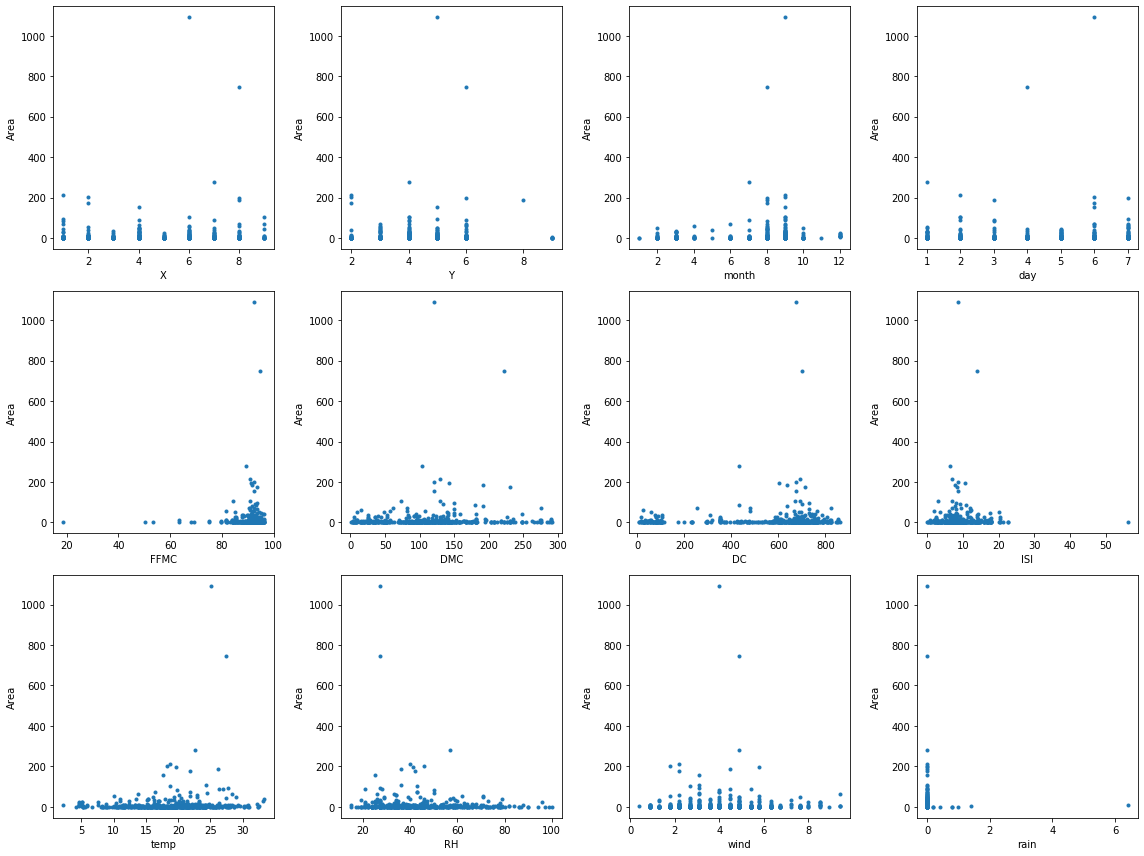

In [28]:
# TODO: Try to generate a 3 by 4 subplot of your own presenting the correlation between each input feature and the target
# Hint: The code should be very similar to the above example
fig = plt.figure(figsize=(16,12))
plt.clf()
for i in range(12):
    plt.subplot(3, 4, i+1)
    plt.plot(X.iloc[:, i], T, '.')
    plt.xlabel(X.columns.values[i])
    plt.ylabel('Area')
fig.tight_layout()

When it is necessary, you can concatenate multiple dataframes to recover your original dataframe. Checkout the code below which concats our data into D. 

In [29]:
D = pd.concat([X, T], axis=1)
D

,X,Y,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area
0,7,5,3,5,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,0.00
1,7,4,10,2,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,0.00
2,7,4,10,6,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,0.00
3,8,6,3,5,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,0.00
4,8,6,3,7,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,4,3,8,7,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,6.44
513,2,4,8,7,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,54.29
514,7,4,8,7,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,11.16
515,1,4,8,6,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,0.00


### Plot with Pandas

When you need both the data values and indicies from an array or DataFrame, we use  Python's `enumerate()` function with the dataframe's column names as a parameter. See the codes below and let us know if you have any question. This is the same codes that matplotlib subplot code but with Pandas `plot()` method.

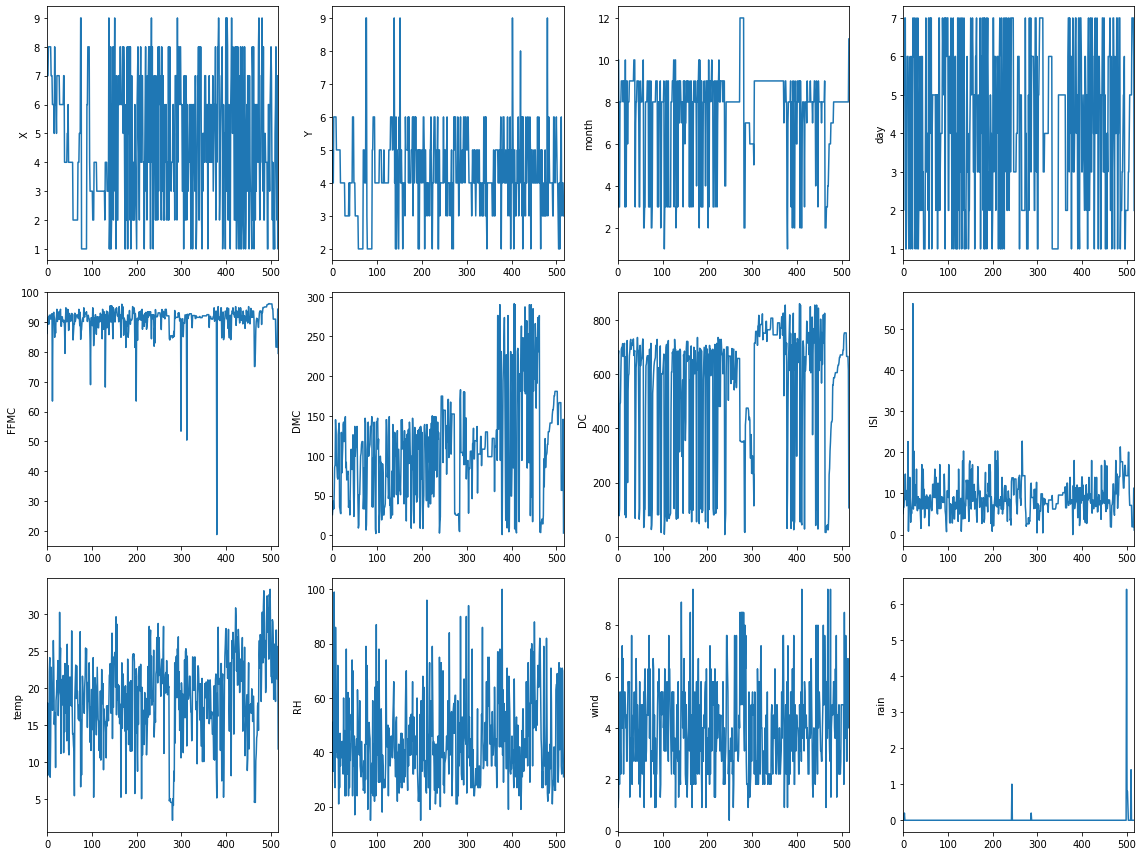

In [30]:
# Try with Pandas plots
fig, axes = plt.subplots(3,4)
fig.set_figheight(12)
fig.set_figwidth(16)
for i, c in enumerate(X.columns.values):
    D.iloc[:, i].plot(y=c, ax=axes[int(i/4), i%4])
    axes[int(i/4), i%4].set_ylabel(c)
fig.tight_layout()

Sometimes, it does not make sense connect all the data points with a line as all the data points might not be related. Scatter plots can help you to present the data as a point without the connecting line. 

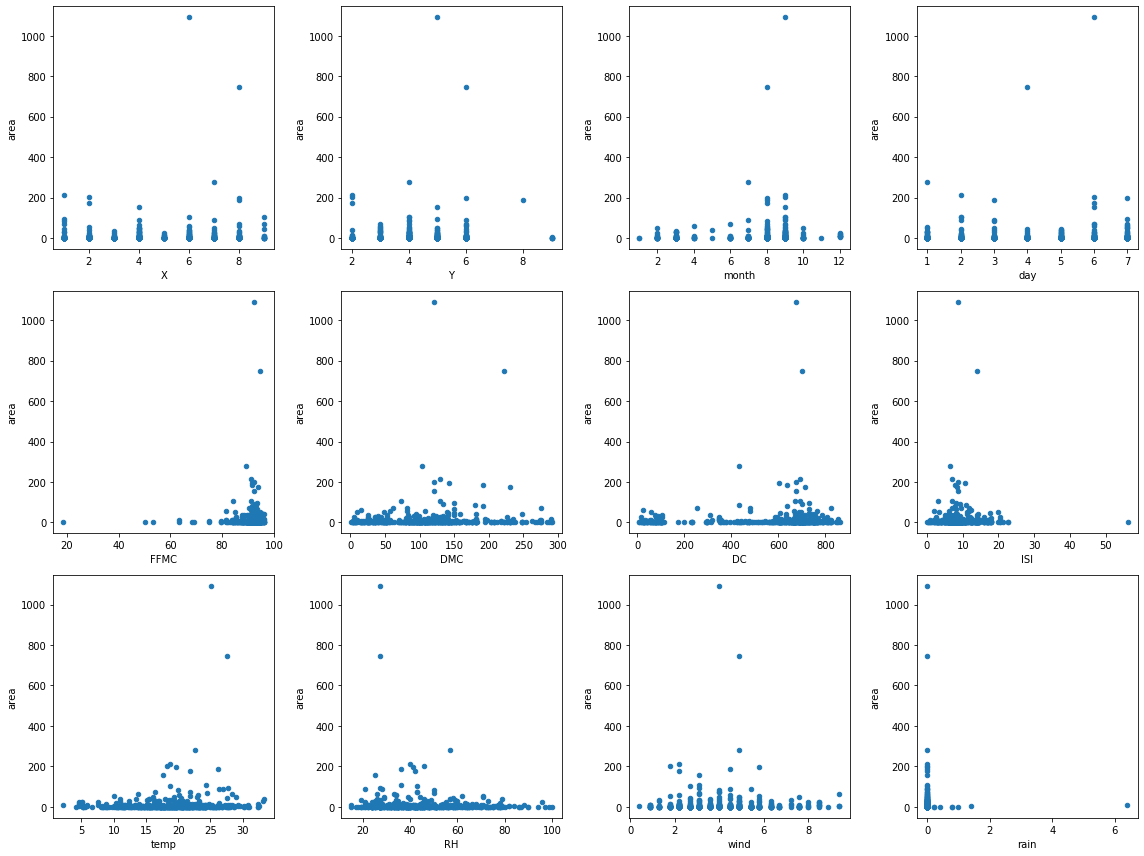

In [31]:
def area_scatter(D):
    """ Function to quickly create matplotlib subplots"""
    fig, axes = plt.subplots(3,4)
    fig.set_figheight(12)
    fig.set_figwidth(16)
    for i,c  in enumerate(X.columns.values):
        #D.plot.hexbin(c, 'area', ax=axes[int(i/4), i%4])
        D.plot.scatter(c, 'area', ax=axes[int(i/4), i%4])
    fig.tight_layout()
    
area_scatter(D)

Recall, that the histogram of target values (the 'area' column) had many values close-to-zero (check out histogram below for reference). Meaning, our data is skewed! This can be problematic in further analysis or ML model application. This is because close-to-zero values can sometimes be more different from one anther than their small values elude to. Therefore, to amplify these differences we want to spread out these close-to-zero values so our data is less skewed.

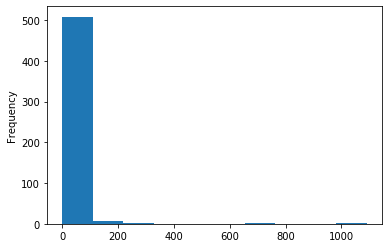

In [32]:
T.plot.hist()

### TODO
1. Try applying the logarithm to each sample in the target data `T`
    - **Hint: Use Pandas `apply()` method again but now applying the log to every sample**
    - **Hint: Remember the log(0) is not possible, try adding 1!**

In [33]:
# Example of what happens if you try to compute log(0)
np.log(T.iloc[0])

/home/dev/miniconda/lib/python3.7/site-packages/ipykernel_launcher.py:2: RuntimeWarning: divide by zero encountered in log
  


-inf

In [34]:
# TODO: Try applying the logarithm on the target data `T`
# Hint: Use Pandas apply() method again but now applying the log to every sample
# Hint: Remember the log(0) is not possible, try adding 1!
Tlog = T.copy()
Tlog = T.apply(lambda x: np.log(x+1))
Tlog

0      0.000000
1      0.000000
2      0.000000
3      0.000000
4      0.000000
         ...   
512    2.006871
513    4.012592
514    2.498152
515    0.000000
516    0.000000
Name: area, Length: 517, dtype: float64

Let's concat these two targets to see the differences in the raw data

In [35]:
pd.concat([T, Tlog], axis=1)

,area,area
0,0.00,0.000000
1,0.00,0.000000
2,0.00,0.000000
3,0.00,0.000000
4,0.00,0.000000
...,...,...
512,6.44,2.006871
513,54.29,4.012592
514,11.16,2.498152
515,0.00,0.000000


Run the code below to replot the histogram using the our newly generated log targets. Notice anything different? Taking the log has done exactly want we wanted! That is spread out the data values to amplify thier differences.

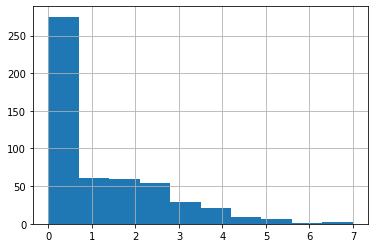

In [36]:
Tlog.hist()

### TODO
1. Now regenerate the scatter plot by concatenating `X` and `Tlog` and then running the `area_scatter()` function

In [37]:
#TODO: Now regenerate the scatter plot by concatenating `X` and `Tlog` like we did with `T` and `Tlog`
D = pd.concat([X, Tlog], axis=1)

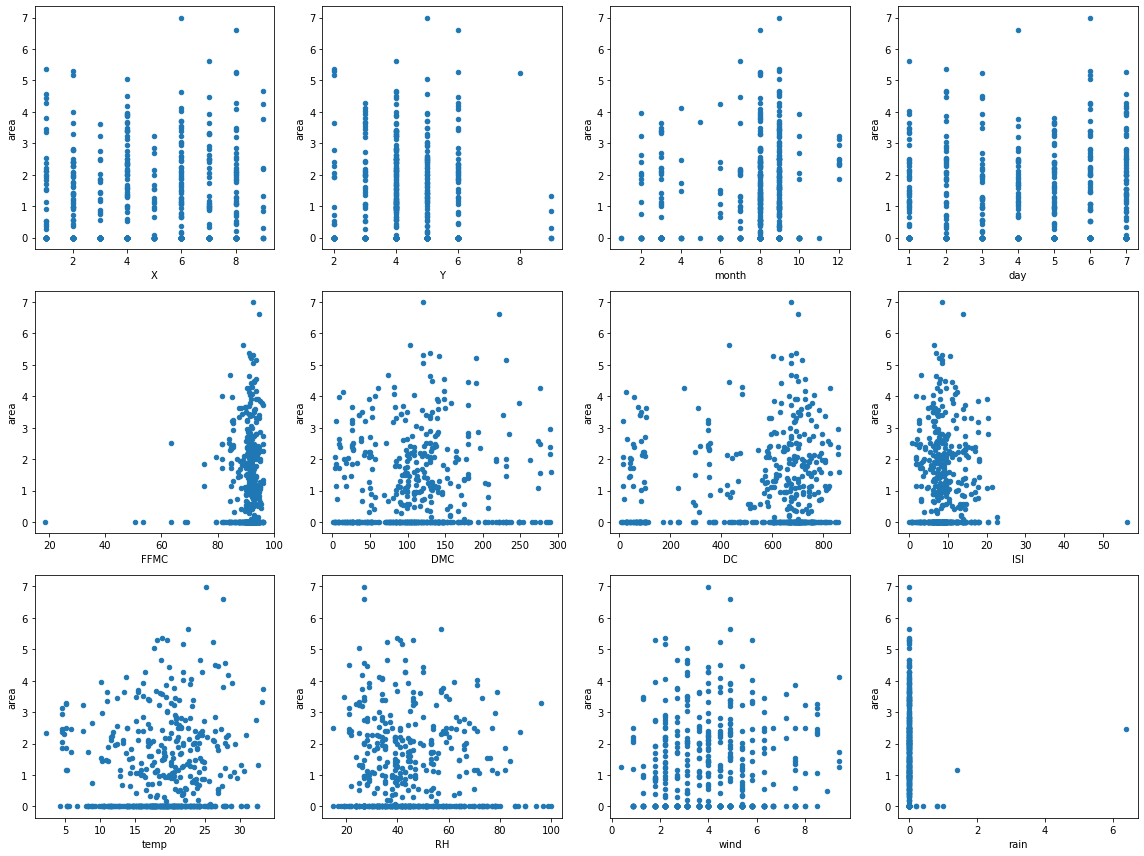

In [38]:
area_scatter(D)

# Practice using the Auto MPG dataset 
Now it's time for you to practice on your own with Auto MPG dataset. Use Pandas to load dataset, check for any null values, and then drop the null values. 

### TODO
1. Load the auto-mpg.data-original using Pandas and then display the DataFrame
    - You should use auto-mpg.data-original, which contains missing or null values
- Check if the DataFrame contains any null values using the knowledge you learned above
- For fun, find the locations of the null values using Numpy's `np.where()` function
- Drop the null values using a Pandas DataFrame method
- Now, recheck check if the DataFrame contains any null values


In [40]:
# TODO: Load the auto-mpg.data-original using Pandas and then display the DataFrame
df = pd.read_csv("auto-mpg.data-original", 
                 names=["mpg", "cylinders", "displacement", "horsepower", "weight", 
                         "acceleration", "model year", "origin", "car name"],
                 delim_whitespace=True) # or delimiter="\s+")
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year,origin,car name
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0,chevrolet chevelle malibu
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0,buick skylark 320
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0,plymouth satellite
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0,amc rebel sst
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0,ford torino
...,...,...,...,...,...,...,...,...,...
401,27.0,4.0,140.0,86.0,2790.0,15.6,82.0,1.0,ford mustang gl
402,44.0,4.0,97.0,52.0,2130.0,24.6,82.0,2.0,vw pickup
403,32.0,4.0,135.0,84.0,2295.0,11.6,82.0,1.0,dodge rampage
404,28.0,4.0,120.0,79.0,2625.0,18.6,82.0,1.0,ford ranger


In [41]:
# TODO: Test to see if the DataFrame contains any missing values
np.any(df.isnull())

True

In [42]:
# TODO: For fun, find the locations of the null values using Numpy's `np.where()` function
np.where(df.isnull())

(array([ 10,  11,  12,  13,  14,  17,  38,  39, 133, 337, 343, 361, 367,
        382]), array([0, 0, 0, 0, 0, 0, 3, 0, 3, 3, 3, 3, 0, 3]))

In [43]:
# TODO: Drop the null values using Pandas DataFrame method
dfnew = df.dropna()
dfnew.shape

(392, 9)

In [44]:
# Now, recheck check if the DataFrame contains any null values
np.any(dfnew.isnull())

False